In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(n_samples, pos_ratio, target_auc):
    """
    生成模拟的二分类数据并绘制ROC曲线
    
    参数:
        n_samples (int): 样本数量（默认1000）
        pos_ratio (float): 正例比例（0~1，默认0.5）
        target_auc (float): 目标AUC值（0.5~1.0，默认0.94）
        random_seed (int): 随机种子（确保结果可复现，默认42）
        title (str): 图表标题（默认'Receiver Operating Characteristic'）
    
    """
    # 设置随机种子
    random_seed=42
    np.random.seed(random_seed)
    
    # 生成真实标签（0为负例，1为正例）
    n_pos = int(n_samples * pos_ratio)
    n_neg = n_samples - n_pos
    true_labels = np.concatenate([np.ones(n_pos), np.zeros(n_neg)])
    
    # 生成预测概率（使AUC接近目标值）
    # 正例预测概率偏高，负例偏低，差异越大AUC越高
    pos_probs = np.random.uniform(low=target_auc-0.1, high=1.0, size=n_pos)  # 正例高概率
    neg_probs = np.random.uniform(low=0.0, high=1.0 - (target_auc-0.1), size=n_neg)  # 负例低概率
    predicted_probs = np.concatenate([pos_probs, neg_probs])
    
    # 计算ROC曲线和AUC
    fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)
    print(f"实际AUC值: {roc_auc:.2f}")
    
    # 绘制ROC曲线
    fig = plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC曲线 (面积 = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 随机猜测基准线
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('假正例率 (False Positive Rate)')
    plt.ylabel('真正例率 (True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

实际AUC值: nan


D:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
D:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.p

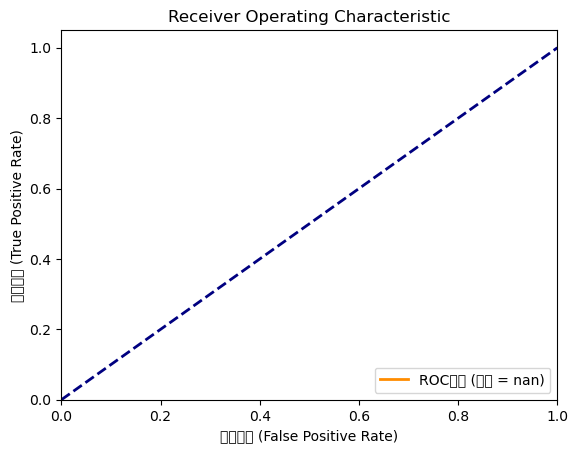

In [5]:
plot_roc_curve(
        n_samples=1000,
        pos_ratio=1.0,  # 原代码中全为正例（true_labels = np.ones(n_samples)）
        target_auc=0.94
    )